In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,...,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4.0,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,...,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4.0,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,...,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4.0,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,...,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3.0,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,...,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4.0,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58.0,214240.0,False,0.688,0.4810,...,-8.807,1.0,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4.0,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74.0,229400.0,False,0.407,0.1470,...,-8.822,1.0,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3.0,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80.0,242946.0,False,0.703,0.4440,...,-9.331,1.0,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4.0,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74.0,189613.0,False,0.625,0.4140,...,-8.700,1.0,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4.0,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56.0,205594.0,False,0.442,0.6320,...,-6.770,1.0,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4.0,acoustic


In [3]:
df.tail(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
89682,89682,08Uk9bJZ0XBAKNsv4Jsini,Jerry Di;Zion & Lennox;Lyanno;Noriel;Luis Albe...,Fiesta Reggaeton 2010s,Verano En París - Remix,0.0,275000.0,False,0.677,0.752,...,-3.975,1.0,0.3840,0.2350,0.000000,0.1890,0.455,192.037,4.0,reggaeton
89683,89683,6TO7OzSCGJ1YP6OSXvxgVO,"Franco ""El Gorilla""",Perreo Tenebroso Vol. 5,Psiquiatrica Loca,0.0,173360.0,False,0.699,0.940,...,-4.718,1.0,0.2230,0.2310,0.000000,0.3310,0.921,186.077,4.0,reggaeton
89684,89684,7qNS4GwQ8xn7twyWHIZk3C,Luny Tunes;Daddy Yankee;Don Omar;Wisin & Yandel,Halloween 2022 Perreo Vol. 5,Mayor Que Yo 3,1.0,304746.0,False,0.715,0.964,...,-3.176,0.0,0.1620,0.0985,0.000000,0.2910,0.535,91.976,4.0,reggaeton
89685,89685,4rCFiYk6EtafNSfr7cvqQo,Joey Montana;De La Ghetto,Del gusto de hermanos,Moribundo,0.0,243666.0,False,0.721,0.824,...,-3.785,1.0,0.0407,0.0354,0.002450,0.4950,0.604,92.989,4.0,reggaeton
89686,89686,7LyHLyC6mKKnSALH9QjWQZ,Jairo Vera,Pa K Te Enamore,Me Llamas,51.0,211337.0,False,0.717,0.521,...,-9.686,0.0,0.0401,0.0220,0.001230,0.0903,0.202,99.986,4.0,reggaeton
89687,89687,0I9l2tj5pWBiJ8rQSjJNUX,Joey Montana;Lalo Ebratt,Fiesta Reggaeton 2010s,No Te Va,0.0,204880.0,False,0.844,0.934,...,-1.223,0.0,0.0780,0.1700,0.000121,0.1340,0.647,96.983,4.0,reggaeton
89688,89688,5f8xBaP905M0O65CGHwDl4,Joey Montana;Sebastian Yatra,Perreo Tenebroso Vol. 2,Suena El Dembow,0.0,195760.0,False,0.690,0.858,...,-4.431,1.0,0.0529,0.1890,0.000000,0.1130,0.755,91.884,4.0,reggaeton
89689,89689,2oe1Sdca8nXPNzyTGqX7L3,Marcianeke,Ponte Pa Mí,Ponte Pa Mí,50.0,214467.0,True,0.843,0.469,...,-11.302,0.0,0.1460,0.3340,0.000000,0.1110,0.821,93.996,4.0,reggaeton
89690,89690,6F1izKHk6MUbau13IUn28s,Luny Tunes;Don Omar;Sharlene;Maluma,Carrete con besties,La Fila,0.0,203760.0,False,0.726,0.931,...,-1.483,0.0,0.0790,0.1110,0.000000,0.2730,0.574,118.069,4.0,reggaeton
89691,89691,2Ekzdvq7V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f'df.columns   : {df.columns}')
print(f'df.shape     : {df.shape}')

df.columns   : Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
df.shape     : (89692, 21)


In [5]:
dtypes_cnt = df.dtypes.groupby(df.dtypes).size()
dtypes_col = df.columns.groupby(df.dtypes)

In [6]:
print("dtypes_cnt    :", dtypes_cnt.to_dict())
print("dtypes_col    :", dtypes_col)

dtypes_cnt    : {dtype('int64'): 1, dtype('float64'): 14, dtype('O'): 6}
dtypes_col    : {int64: ['Unnamed: 0'], float64: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'], object: ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']}


In [7]:
selected_df = df.select_dtypes(include=['int64', 'float64']).head()
selected_df = selected_df.rename_axis('Column Name').reset_index()

styled_df = selected_df.style.background_gradient(cmap='viridis', subset=pd.IndexSlice[:, ['Column Name']])
styled_df



,Column Name,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0,73.000000,230666.000000,0.676000,0.461000,1.000000,-6.746000,0.000000,0.143000,0.032200,0.000001,0.358000,0.715000,87.917000,4.000000
1,1,1,55.000000,149610.000000,0.420000,0.166000,1.000000,-17.235000,1.000000,0.076300,0.924000,0.000006,0.101000,0.267000,77.489000,4.000000
2,2,2,57.000000,210826.000000,0.438000,0.359000,0.000000,-9.734000,1.000000,0.055700,0.210000,0.000000,0.117000,0.120000,76.332000,4.000000
3,3,3,71.000000,201933.000000,0.266000,0.059600,0.000000,-18.515000,1.000000,0.036300,0.905000,0.000071,0.132000,0.143000,181.740000,3.000000
4,4,4,82.000000,198853.000000,0.618000,0.443000,2.000000,-9.681000,1.000000,0.052600,0.469000,0.000000,0.082900,0.167000,119.949000,4.000000


In [8]:
selected_df = df.select_dtypes(include=['object', 'bool']).head()
selected_df = selected_df.rename_axis('Column Name').reset_index()

styled_df = selected_df.style.background_gradient(cmap='viridis')
styled_df


,Column Name,track_id,artists,album_name,track_name,explicit,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Soundtrack),Can't Help Falling In Love,False,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic


In [9]:
df.select_dtypes(include=['int64', 'float64']).describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89692.000000,89691.000000,8.969100e+04,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000,89691.000000
mean,44845.500000,33.101604,2.304607e+05,0.567049,0.658294,5.318850,-7.999731,0.634177,0.088107,0.288647,0.157896,0.210154,0.468633,122.941816,3.912578
std,25891.994509,22.669287,1.099466e+05,0.174600,0.249917,3.554986,4.956688,0.481663,0.112371,0.325885,0.310476,0.185067,0.255403,29.572142,0.407554
min,0.000000,0.000000,0.000000e+00,0.000000,0.000020,0.000000,-43.957000,0.000000,0.000000,0.000000,0.000000,0.009250,0.000000,0.000000,0.000000
25%,22422.750000,16.000000,1.766660e+05,0.452000,0.496000,2.000000,-9.666500,0.000000,0.036200,0.011600,0.000000,0.097300,0.257000,99.990500,4.000000
50%,44845.500000,34.000000,2.149860e+05,0.578000,0.706000,5.000000,-6.711000,1.000000,0.050100,0.131000,0.000053,0.132000,0.456000,122.975000,4.000000
75%,67268.250000,51.000000,2.640480e+05,0.697000,0.868000,8.000000,-4.791000,1.000000,0.088300,0.539000,0.055400,0.272000,0.673000,140.771000,4.000000
max,89691.000000,100.000000,5.237295e+06,0.984000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,0.999000,1.000000,0.995000,243.372000,5.000000


In [10]:
df.select_dtypes(include=['object', 'bool']).describe()

,track_id,artists,album_name,track_name,explicit,track_genre
count,89692,89690,89690,89690,89691,89691
unique,71952,25416,37483,59194,2,90
top,5ZsAhuQ24mWHiduaxJqnhW,The Beatles,Feliz Cumpleaños con Perreo,Halloween,False,acoustic
freq,7,276,184,82,81270,1000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89692 entries, 0 to 89691
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89692 non-null  int64  
 1   track_id          89692 non-null  object 
 2   artists           89690 non-null  object 
 3   album_name        89690 non-null  object 
 4   track_name        89690 non-null  object 
 5   popularity        89691 non-null  float64
 6   duration_ms       89691 non-null  float64
 7   explicit          89691 non-null  object 
 8   danceability      89691 non-null  float64
 9   energy            89691 non-null  float64
 10  key               89691 non-null  float64
 11  loudness          89691 non-null  float64
 12  mode              89691 non-null  float64
 13  speechiness       89691 non-null  float64
 14  acousticness      89691 non-null  float64
 15  instrumentalness  89691 non-null  float64
 16  liveness          89691 non-null  float6

In [12]:
df.isna().sum()

,0
Unnamed: 0,0
track_id,0
artists,2
album_name,2
track_name,2
popularity,1
duration_ms,1
explicit,1
danceability,1
energy,1


In [13]:
print('column name'.ljust(20), '# unique values')
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    print(col.ljust(20), '=>', len(df[col].unique()))

column name          # unique values
Unnamed: 0           => 89692
popularity           => 102
duration_ms          => 43250
danceability         => 1105
energy               => 1905
key                  => 13
loudness             => 17973
mode                 => 3
speechiness          => 1476
acousticness         => 5040
instrumentalness     => 5296
liveness             => 1713
valence              => 1656
tempo                => 38429
time_signature       => 6


In [14]:
print('column name'.ljust(20), '# unique values')
for col in df.select_dtypes(include=['object', 'bool']).columns:
    print(col.ljust(20), '=>', len(df[col].unique()))

column name          # unique values
track_id             => 71952
artists              => 25417
album_name           => 37484
track_name           => 59195
explicit             => 3
track_genre          => 91


In [15]:
categorical_columns = ['key', 'mode', 'time_signature', 'explicit']

for col in categorical_columns:
    print(col.ljust(20), '=>', df[col].unique())



key                  => [ 1.  0.  2.  6. 11.  8.  4.  7.  3. 10.  5.  9. nan]
mode                 => [ 0.  1. nan]
time_signature       => [ 4.  3.  1.  5.  0. nan]
explicit             => [False True nan]


In [16]:
df = df.drop(columns=['Unnamed: 0', 'track_id'])

Visualization

In [17]:
# Distribution Plots:
def my_histplot(df, col, ax):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram Plot of {col}')
def my_distplot(df, col, ax):
    sns.distplot(df[col], ax=ax)
    ax.set_title(f'Distribution Plot of {col}')
def my_kdeplot(df, col, ax):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f'KDE Plot of {col}')

# Relational Plots:
def my_scatterplot(df, col, ax):
    sns.scatterplot(df[col], ax=ax)
    ax.set_title(f'Scatter Plot of {col}')
def my_lineplot(df, col, ax):
    sns.lineplot(df[col], ax=ax)
    ax.set_title(f'Line Plot of {col}')

# Categorical Plots:
def my_pie_chart(df, col, ax):
    labels = df[col].value_counts()
    ax.pie(labels, labels=labels.index, autopct='%1.1f%%')
    ax.set_title(f'Pie Chart of {col}')
def my_countplot(df, col, ax):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f'Count Plot of {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)





# Matrix Plots:
def my_heatmap(df, size):
    if size: plt.figure(figsize=size)
    sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Blues', annot_kws={"size": 12})
    plt.title('Correlation Heatmap')
    plt.show()

In [18]:
def plot_charts_grid_single_feature(df, plot_func, size=(12, 4), n_col=1):
    if len(df.columns) == 0:
        return
    n_rows = (len(df.columns) + n_col-1) // n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(size[0]*n_col, size[1]*n_rows))
    if len(df.columns) == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    for i, label in enumerate(df.columns):
        plot_func(df, label, axes[i])
        axes[i].set_xlabel(label)

    for j in range(i+1, n_rows*n_col):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

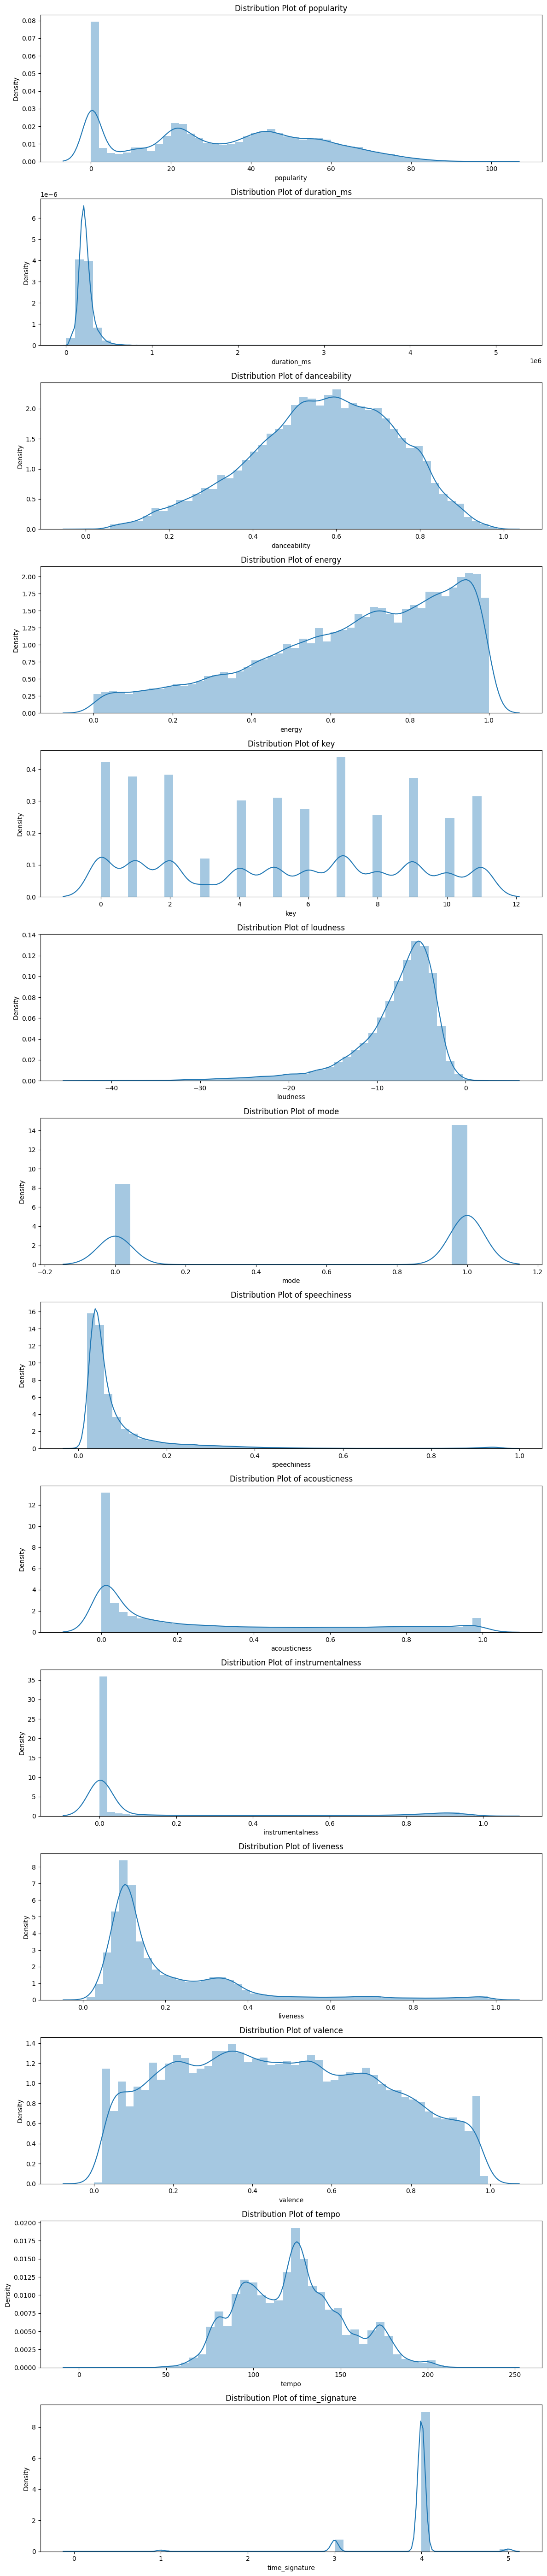

In [19]:
plot_charts_grid_single_feature(df.select_dtypes(include=['int64', 'float64']), my_distplot)

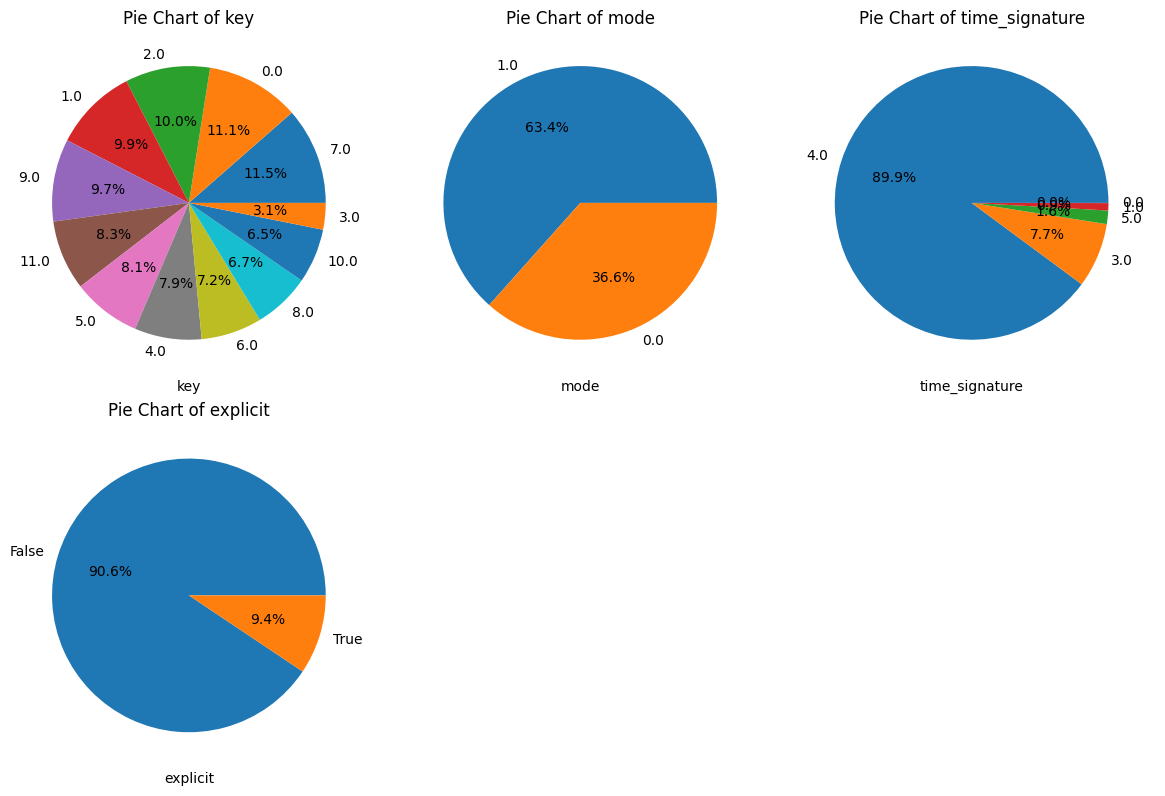

In [20]:
plot_charts_grid_single_feature(df[categorical_columns], my_pie_chart, size=(4, 4), n_col=3)

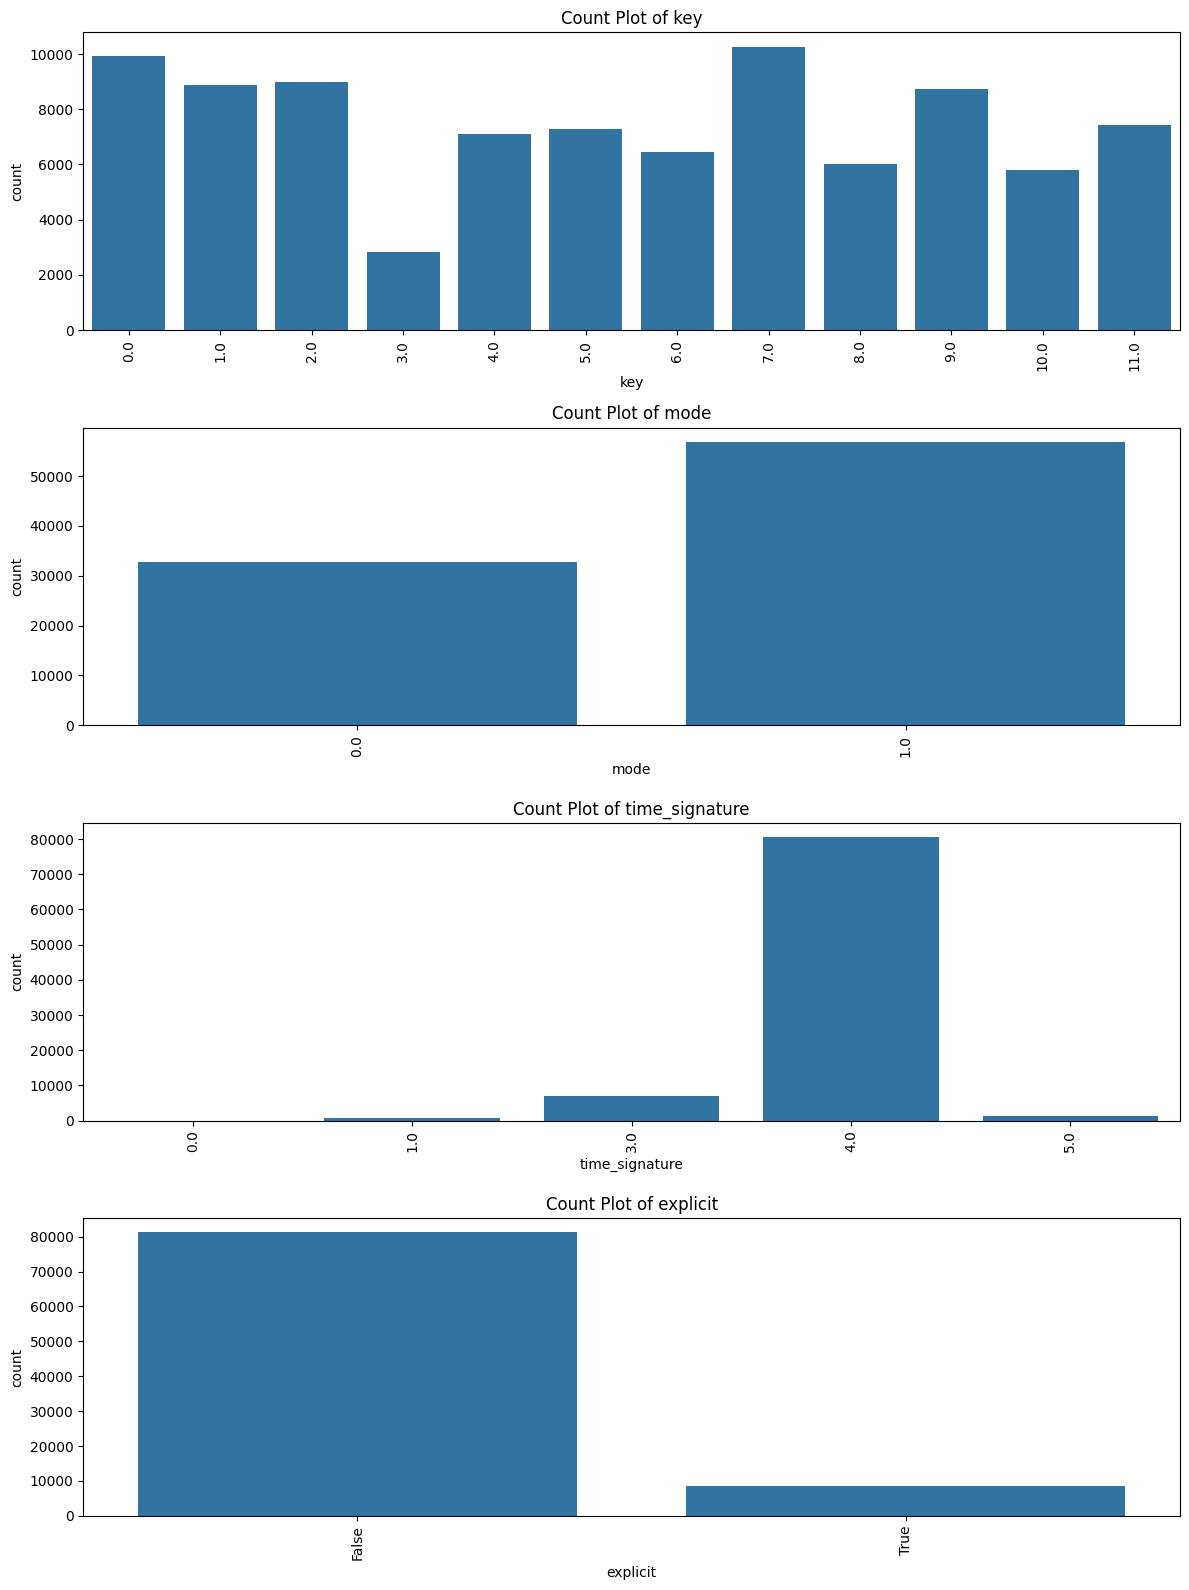

In [21]:
plot_charts_grid_single_feature(df[categorical_columns], my_countplot)

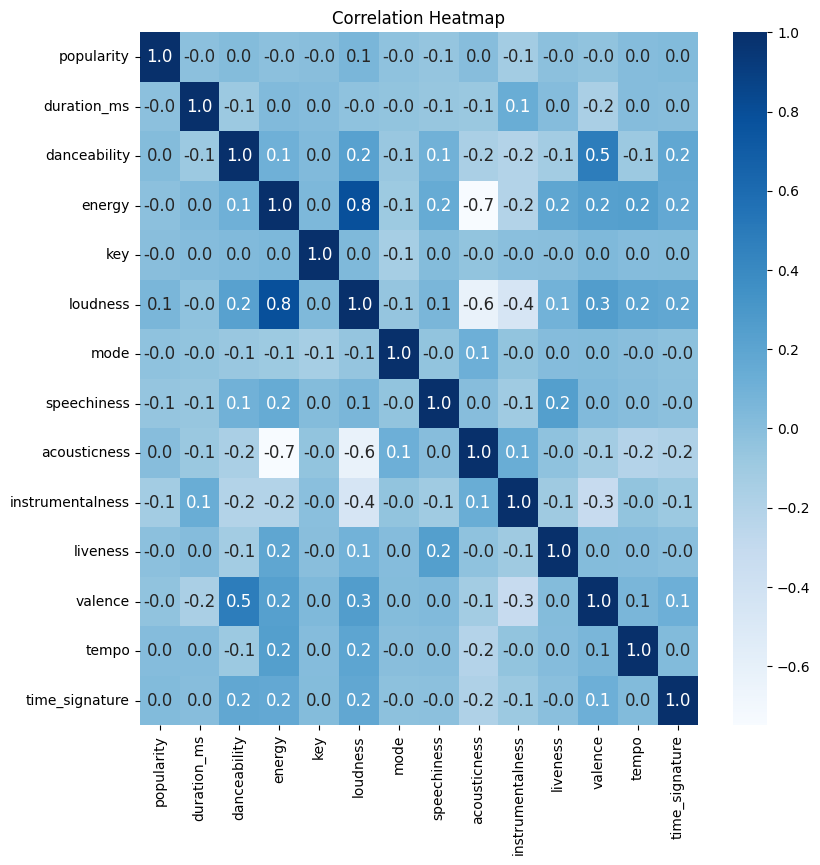

In [22]:
n_numeric_cols = len(df.select_dtypes(include=['int64', 'float64']).columns) // 3 * 2
my_heatmap(df.select_dtypes(include=['int64', 'float64']), size=(n_numeric_cols+1, n_numeric_cols+1))

Modeling

.....

In [23]:
import numpy as np

num_samples = 100
num_features = 5
X_train = np.random.rand(num_samples, num_features)




In [24]:
import numpy as np

num_samples = 100
y_train = np.random.rand(num_samples)



In [25]:

num_test_samples = 50
X_test = np.random.rand(num_test_samples, num_features)
y_test = np.random.rand(num_test_samples)




Linear Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity'], test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_predicted = model.predict(X_test)

mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")



ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Cart

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity'], test_size=0.2, random_state=42)

regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train, y_train)

y_pred_dt = regressor_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R1): {r2_dt}")



ValueError: Input contains NaN.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity'], test_size=0.2, random_state=42)

regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

y_pred_rf = regressor_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")


Mean Squared Error (MSE): 271.4728008476088
Mean Absolute Error (MAE): 11.964133034617351
R-squared (R2): 0.4498818313928825


XGBRegressor


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity'], test_size=0.2, random_state=42)

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 421.76914866594376
Mean Absolute Error (MAE): 16.932193362048842
R-squared (R2): 0.14531816478609938


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def convert_to_class(popularity):
    if popularity < 30:
        return 'low'
    elif popularity < 70:
        return 'medium'
    else:
        return 'high'

df['popularity_class'] = df['popularity'].apply(convert_to_class)


X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity_class'], test_size=0.2, random_state=42)


classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.677061403508772
Confusion Matrix:
[[ 628  203  220]
 [ 264 6646 3211]
 [ 393 3072 8163]]


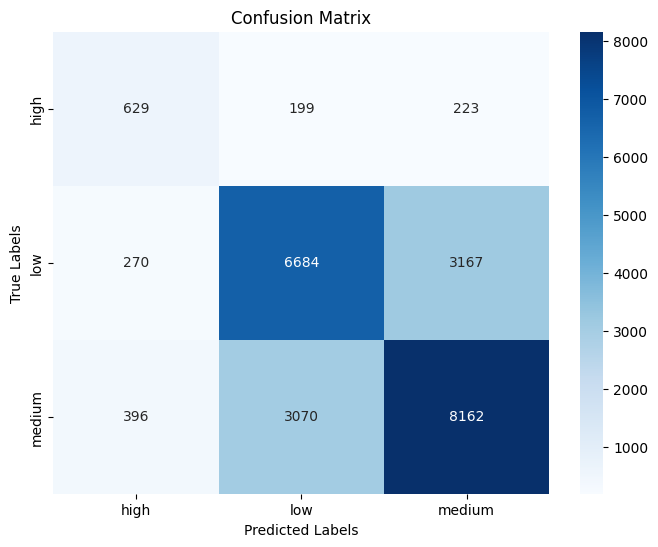

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(df[['danceability', 'energy', 'acousticness']], df['popularity_class'], test_size=0.2, random_state=42)


classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
